In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from pandas_profiling import ProfileReport
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# convert object to numeric column of chrges
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# again check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# fill null values
df.fillna(df.median(),inplace=True)

In [10]:
# prepare profile report od datasets
report=ProfileReport(df,title='Customers churn attrition')

In [11]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# drop unnecessary columns
df.drop(['customerID'],axis=1,inplace=True)

In [13]:
# statistics description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# check unique values of objective columns
for i in df.columns:
    if df[i].dtypes == 'O':
        print(df[i].value_counts(),'\n')
        print("-----------")

Male      3555
Female    3488
Name: gender, dtype: int64 

-----------
No     3641
Yes    3402
Name: Partner, dtype: int64 

-----------
No     4933
Yes    2110
Name: Dependents, dtype: int64 

-----------
Yes    6361
No      682
Name: PhoneService, dtype: int64 

-----------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

-----------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

-----------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

-----------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

-----------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

-----------
No                     3473
Yes                    2044
No internet service    1526
Name: T

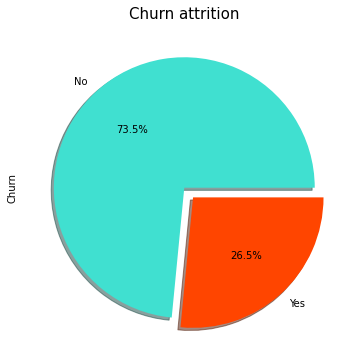

In [15]:
# show customer churn ratio
df['Churn'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0,0.1],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Churn attrition',fontsize=15)
plt.show()
# customer churn attrition are 27%  about 70-30% ratio is there

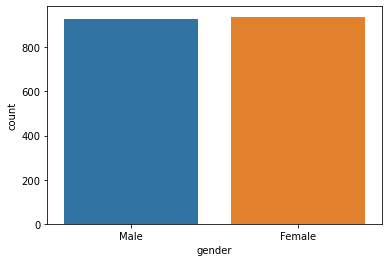

In [16]:
# churn customer by gender is not much difference
sns.countplot(x='gender',data=df.loc[df['Churn']=='Yes'])
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

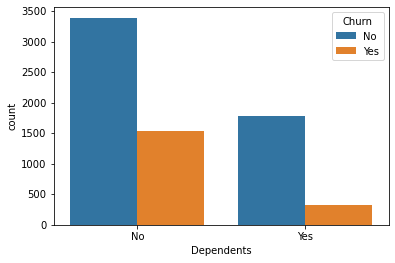

In [17]:
# most of customer leaves are independant almost 50% of the total customers
sns.countplot(x='Dependents',hue='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

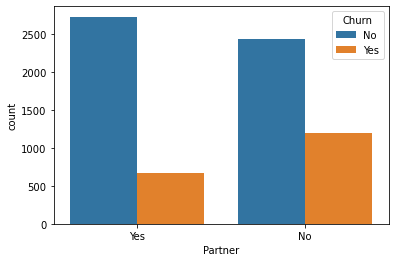

In [18]:
# without partner customer are most of attrition
sns.countplot(x='Partner',hue='Churn',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

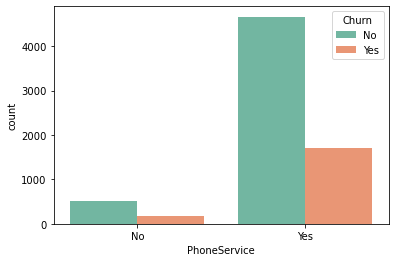

In [19]:
# Most of customers attrition bcs of phoneservices that not proper provided by telecom service
sns.countplot(x='PhoneService',hue='Churn',data=df,palette='Set2')

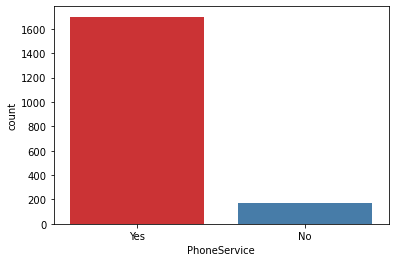

In [20]:

sns.countplot(x='PhoneService',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

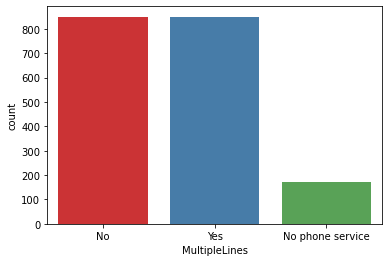

In [21]:
# It's not much effect on churn attrition both who have line or not are leave the service
sns.countplot(x='MultipleLines',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

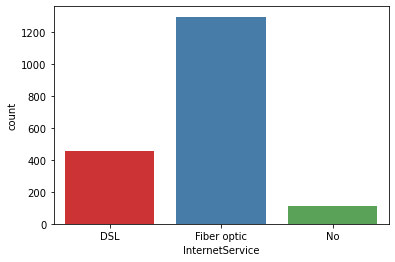

In [22]:
# in that cutomer leavs in fiber optic services bcs not much better provide by company
sns.countplot(x='InternetService',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

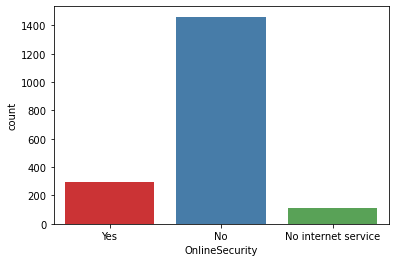

In [23]:
# customer who have not ptovide online security are left from service most
sns.countplot(x='OnlineSecurity',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

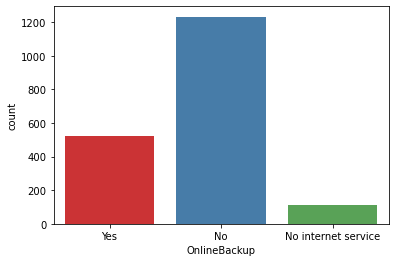

In [24]:
# customer who have not ptovide online backup are left from service most
sns.countplot(x='OnlineBackup',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

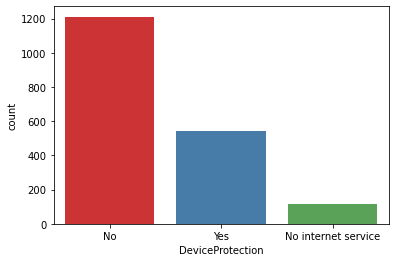

In [25]:
# customer who have not ptovide device protection are left from service most
sns.countplot(x='DeviceProtection',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

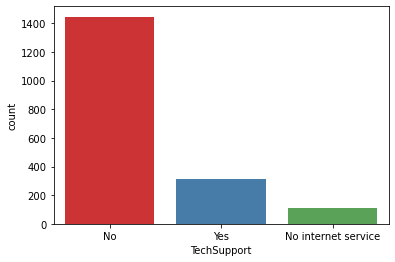

In [26]:
# customer who have not ptovide sufficient tele support services are left most 
sns.countplot(x='TechSupport',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

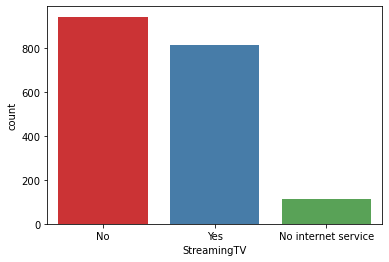

In [27]:
sns.countplot(x='StreamingTV',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

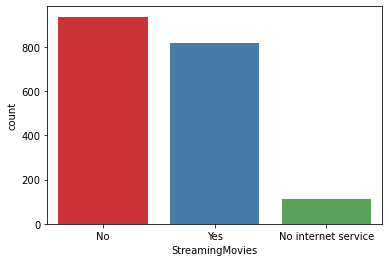

In [28]:
sns.countplot(x='StreamingMovies',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

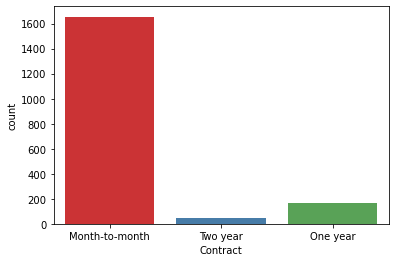

In [29]:
# monthly customer are leave most from tele services
sns.countplot(x='Contract',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.show()

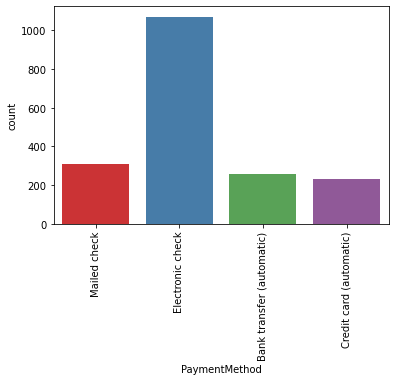

In [30]:
# electronic check method user customer are left bcs of may be service not available in company 
sns.countplot(x='PaymentMethod',data=df.loc[df['Churn']=='Yes'],palette='Set1')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

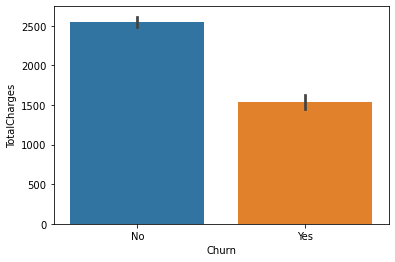

In [31]:
sns.barplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

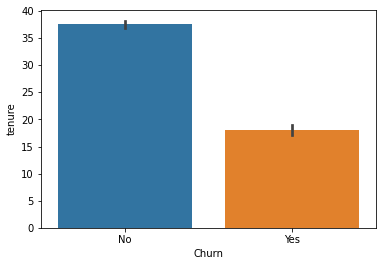

In [32]:
sns.barplot(x='Churn',y='tenure',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

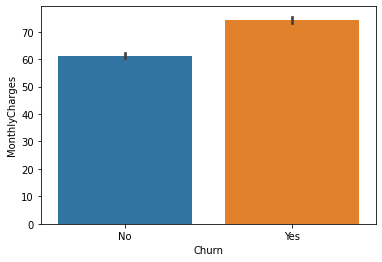

In [33]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df)

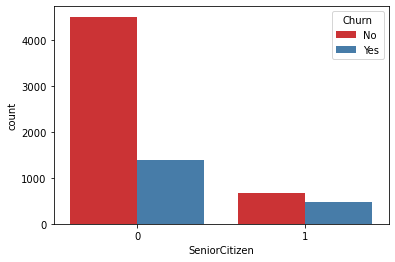

In [34]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,palette='Set1')
plt.show()

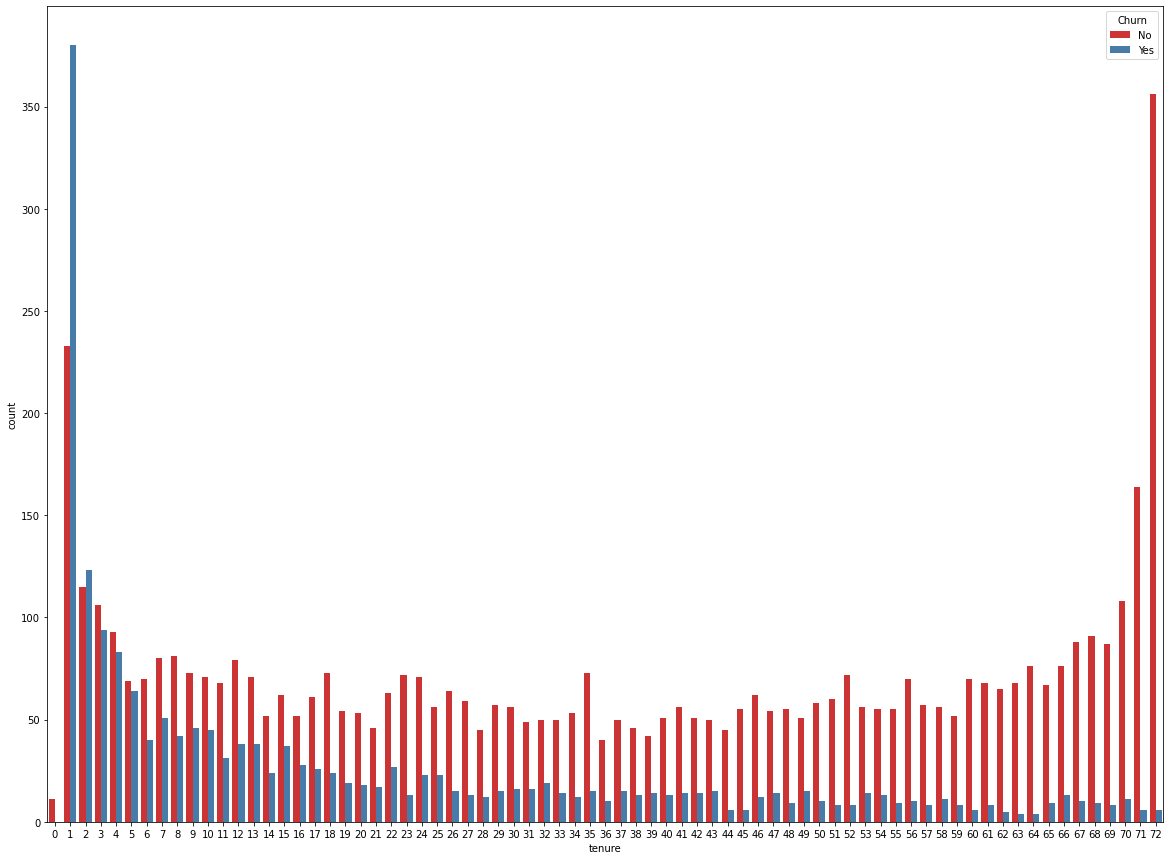

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(x='tenure',hue='Churn',data=df,palette='Set1')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [37]:
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'O':
        df[i]=lb.fit_transform(df[i])

In [38]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


<AxesSubplot:>

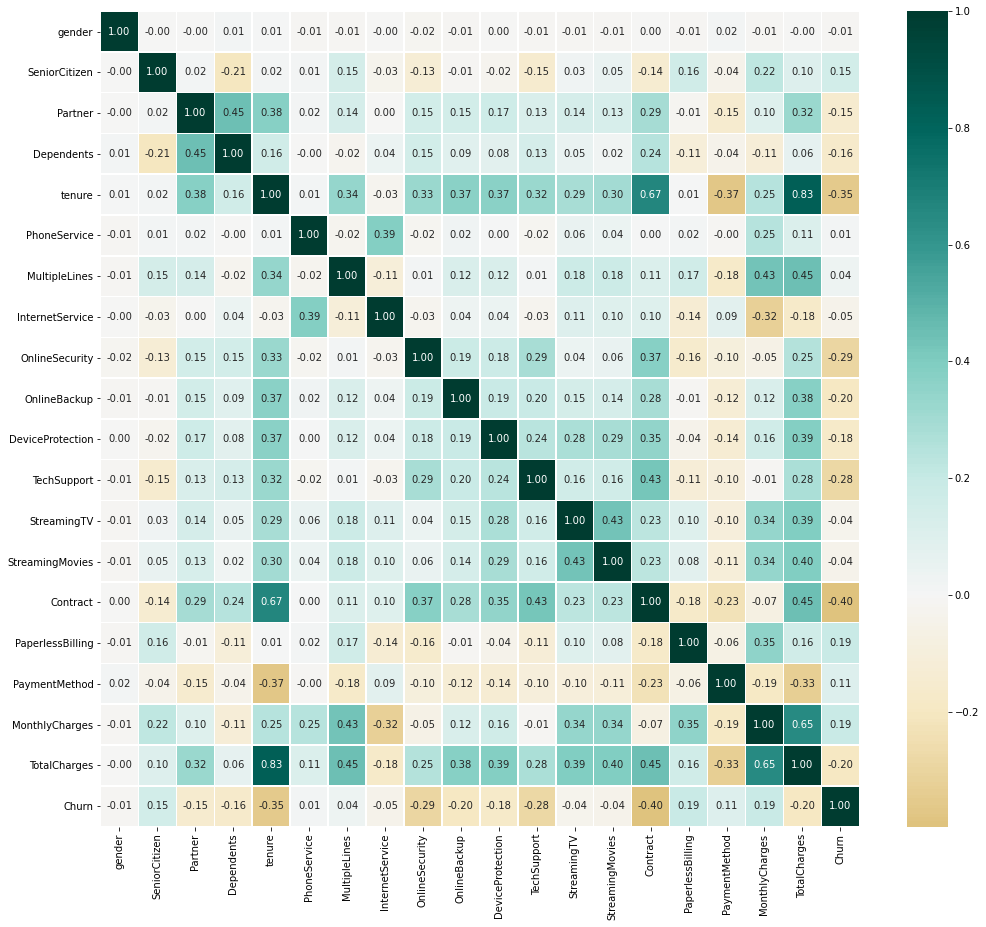

In [39]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',center=0,linewidth=0.5,fmt='0.2f')

In [40]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

In [41]:
x=df.iloc[:,0:-1]

In [42]:
y=df.iloc[:,-1]

In [43]:
for index in x.skew().index:
    if x.skew().loc[index] > 0.90:
        x[index]=np.sqrt(x[index])

In [44]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.309838
dtype: float64

In [46]:
sc=StandardScaler()
x1=sc.fit_transform(x)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,1.001815,gender
1,1.149643,SeniorCitizen
2,1.462277,Partner
3,1.382631,Dependents
4,14.601819,tenure
5,1.622341,PhoneService
6,1.398753,MultipleLines
7,1.865096,InternetService
8,1.266365,OnlineSecurity
9,1.206340,OnlineBackup


#### from vif streamtv and streammovies are multicolinearity so drop one of them
#### dependent and partner have multicolinearity so as per co relation with target dependents are remove

In [48]:
# drop columns due to multicolinearity
x.drop(['Dependents','StreamingMovies','tenure'],axis=1,inplace=True)

In [52]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1.shape

(7043, 16)

In [53]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3)

In [54]:
from imblearn.over_sampling import SMOTE
x1,y1 = SMOTE().fit_resample(x_train,y_train)

In [56]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(roc_auc_score(y_train,pred_tr)*100,1)==round(roc_auc_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('roc_auc_score TR',roc_auc_score(y_train,pred_tr)*100)
        print('roc_auc_score TE',roc_auc_score(y_test,pred_te)*100)


 Random State 9
roc_auc_score TR 78.38872519910687
roc_auc_score TE 78.36652020147893

 Random State 19
roc_auc_score TR 78.44909441202775
roc_auc_score TE 78.37458975071246

 Random State 24
roc_auc_score TR 78.26368315651841
roc_auc_score TE 78.34865487400063

 Random State 33
roc_auc_score TR 78.2489368190382
roc_auc_score TE 78.23461227177327

 Random State 58
roc_auc_score TR 78.06231034665416
roc_auc_score TE 78.11892550277403

 Random State 74
roc_auc_score TR 78.40203474761152
roc_auc_score TE 78.38187030819722

 Random State 83
roc_auc_score TR 78.17808257176864
roc_auc_score TE 78.18755248222145

 Random State 123
roc_auc_score TR 78.11455516261007
roc_auc_score TE 78.0698700739703

 Random State 149
roc_auc_score TR 78.29178342703318
roc_auc_score TE 78.25816685243933

 Random State 161
roc_auc_score TR 78.30757064383505
roc_auc_score TE 78.28031080486733

 Random State 197
roc_auc_score TR 78.42122864105883
roc_auc_score TE 78.38627870071014

 Random State 248
roc_auc_scor

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=9)
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
print('Train score: ',lg.score(x_train,y_train)*100)
print('f1 Score:  ',f1_score(y_test,predict)*100)
print('accuracy score ',accuracy_score(y_test,predict)*100)
print('roc auc score ',roc_auc_score(y_test,predict)*100)
print('Confusion matrix \n',confusion_matrix(y_test,predict))
print('Classification report \n',classification_report(y_test,predict))

Train score:  79.55190017016449
f1 Score:   78.81462799495586
accuracy score  77.77777777777779
roc auc score  77.79842422142787
Confusion matrix 
 [[551 208]
 [128 625]]
Classification report 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       759
           1       0.75      0.83      0.79       753

    accuracy                           0.78      1512
   macro avg       0.78      0.78      0.78      1512
weighted avg       0.78      0.78      0.78      1512



In [58]:
neighbors={"n_neighbors":range(1,20)}
clf = GridSearchCV(KNeighborsClassifier(),neighbors, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'n_neighbors': 7}

In [59]:
dtc=DecisionTreeClassifier()
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
kn=KNeighborsClassifier(n_neighbors=7)
sgd=SGDClassifier()
xgb=XGBClassifier()
xgbr=XGBRFClassifier()

In [60]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('F1 score:\n',f1_score(y_test,pred)*100)
    print('roc auc score ',roc_auc_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

In [61]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
Accuracy score:
 76.12433862433863
F1 score:
 76.81438664097622
roc auc score  76.13734784183424
Confusion matrix:
 [[553 206]
 [155 598]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       759
           1       0.74      0.79      0.77       753

    accuracy                           0.76      1512
   macro avg       0.76      0.76      0.76      1512
weighted avg       0.76      0.76      0.76      1512



In [62]:
classifiers(svc)

SVC() 
 83.91945547362451
Accuracy score:
 79.82804232804233
F1 score:
 80.8296668761785
roc auc score  79.85003333175861
Confusion matrix:
 [[564 195]
 [110 643]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       759
           1       0.77      0.85      0.81       753

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [63]:
classifiers(svcl)

SVC(kernel='linear') 
 78.8712422007941
Accuracy score:
 77.11640211640211
F1 score:
 78.42892768079801
roc auc score  77.14176233143841
Confusion matrix:
 [[537 222]
 [124 629]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       759
           1       0.74      0.84      0.78       753

    accuracy                           0.77      1512
   macro avg       0.78      0.77      0.77      1512
weighted avg       0.78      0.77      0.77      1512



In [64]:
classifiers(svcp)

SVC(kernel='poly') 
 83.63584798638684
Accuracy score:
 78.43915343915344
F1 score:
 79.52261306532662
roc auc score  78.4613850264292
Confusion matrix:
 [[553 206]
 [120 633]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       759
           1       0.75      0.84      0.80       753

    accuracy                           0.78      1512
   macro avg       0.79      0.78      0.78      1512
weighted avg       0.79      0.78      0.78      1512



In [65]:
classifiers(kn)

KNeighborsClassifier(n_neighbors=7) 
 82.75666477595009
Accuracy score:
 74.93386243386243
F1 score:
 77.48068924539511
roc auc score  74.97992220839961
Confusion matrix:
 [[481 278]
 [101 652]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.63      0.72       759
           1       0.70      0.87      0.77       753

    accuracy                           0.75      1512
   macro avg       0.76      0.75      0.75      1512
weighted avg       0.76      0.75      0.75      1512



In [66]:
classifiers(sgd)

SGDClassifier() 
 77.59500850822462
Accuracy score:
 75.1984126984127
F1 score:
 76.5184721352536
roc auc score  75.22190552677301
Confusion matrix:
 [[526 233]
 [142 611]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74       759
           1       0.72      0.81      0.77       753

    accuracy                           0.75      1512
   macro avg       0.76      0.75      0.75      1512
weighted avg       0.76      0.75      0.75      1512



In [67]:
classifiers(xgb)

[13:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 98.12819058423142
Accuracy score:
 84.12698412698413
F1 score:
 84.33420365535248
roc auc score  84.133557

In [68]:
classifiers(xgbr)

[13:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) 
 83.86273397617697
Accuracy score:
 80.88624338624338
F1 score:
 81.76656151419559
roc auc score  80.90667632500302
Confusion matrix:


In [69]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [70]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

RandomForestClassifier() 

 score: 
 100.0
 F1 score: 83.69070825211176
Accuracy scoer:
 83.3994708994709
Confusion_matrix:
 [[617 142]
 [109 644]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       759
           1       0.82      0.86      0.84       753

    accuracy                           0.83      1512
   macro avg       0.83      0.83      0.83      1512
weighted avg       0.83      0.83      0.83      1512

AdaBoostClassifier() 

 score: 
 82.84174702212138
 F1 score: 82.10526315789473
Accuracy scoer:
 80.88624338624338
Confusion_matrix:
 [[560 199]
 [ 90 663]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79       759
           1       0.77      0.88      0.82       753

    accuracy                           0.81      1512
   macro avg       0.82      0.81      0.81      1512
weighted avg       0.82      0.81      0.81     

In [71]:
parameters={"n_estimators":[1000,500,100,70],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'class_weight':['balanced','balanced_subsample']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [72]:
parameters={"n_estimators":[1000,500,100,50],'learning_rate':[0.1,0.01,1],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 500}

In [74]:
rf=RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators=1000,class_weight='balanced_subsample')
rf.fit(x_train,y_train)
print(rf,'\n\n score: \n',rf.score(x_train,y_train)*100)
pred_rf=rf.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_rf)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_rf)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_rf))
print('Classification report:\n',classification_report(y_test,pred_rf))

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt', n_estimators=1000) 

 score: 
 100.0
 F1 score: 84.42146089204913
Accuracy scoer:
 84.06084656084656
Confusion_matrix:
 [[618 141]
 [100 653]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       759
           1       0.82      0.87      0.84       753

    accuracy                           0.84      1512
   macro avg       0.84      0.84      0.84      1512
weighted avg       0.84      0.84      0.84      1512



In [75]:
gd=GradientBoostingClassifier(learning_rate=0.1,max_features='log2',n_estimators=500)
gd.fit(x_train,y_train)
print(gd,'\n\n score: \n',gd.score(x_train,y_train)*100)
pred_gd=gd.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_gd)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_gd)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_gd))
print('Classification report:\n',classification_report(y_test,pred_gd))

GradientBoostingClassifier(max_features='log2', n_estimators=500) 

 score: 
 90.86783891094726
 F1 score: 84.43579766536965
Accuracy scoer:
 84.12698412698413
Confusion_matrix:
 [[621 138]
 [102 651]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       759
           1       0.83      0.86      0.84       753

    accuracy                           0.84      1512
   macro avg       0.84      0.84      0.84      1512
weighted avg       0.84      0.84      0.84      1512



In [73]:
parameters={"n_estimators":[100,70,50],'learning_rate':[0.1,0.01],'max_depth':[3,5,7],'subsample':[0.8,1],'eval_metric':['mlogloss','logloss']}
clf = GridSearchCV(XGBRFClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'eval_metric': 'mlogloss',
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 70,
 'subsample': 0.8}

In [76]:
xg2=XGBRFClassifier(scale_pos_weight=1,
                      learning_rate=0.01,
                      subsample =0.8, 
                      n_estimators=70, 
                      reg_alpha = 0.25,
                      max_depth=7,
                 eval_metric='mlogloss')
xg2.fit(x_train,y_train)
print(xg2,'\n\n score: \n',xg2.score(x_train,y_train)*100)
pred_xgr=xg2.predict(x_test)
print('auc roc score:',roc_auc_score(y_test,pred_xgr)*100)
print(' F1 score:',f1_score(y_test,pred_xgr)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_xgr)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_xgr))
print('Classification report:\n',classification_report(y_test,pred_xgr))

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, eval_metric='mlogloss', gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=7,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=70, n_jobs=8, num_parallel_tree=70,
                objective='binary:logistic', random_state=0, reg_alpha=0.25,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) 

 score: 
 86.38684061259218
auc roc score: 81.43211081891145
 F1 score: 82.11330362826226
Accuracy scoer:
 81.41534391534393
Confusion_matrix:
 [[586 173]
 [108 645]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.81       759
           1       0.79      0.86      0.82       753

    accuracy               

In [78]:
from sklearn.ensemble import VotingClassifier
clf1 = gd
clf2 = rf
clf3 = xg2
vtc = VotingClassifier(estimators=[('gd', clf1), ('rf', clf2), ('xg2', clf3)], voting='soft')
vtc.fit(x_train, y_train)
predictions = vtc.predict(x_test)
print(vtc.score(x_train,y_train))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.970504821327283
0.8505291005291006
0.8545688545688547
0.8506527250681071
[[622 137]
 [ 89 664]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       759
           1       0.83      0.88      0.85       753

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512



In [82]:
for i in range(2,10):
    crs_score=cross_val_score(VotingClassifier(estimators=[('gd', clf1), ('rf', clf2), ('xg2', clf3)]),x1,y1,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',roc_auc_score(y_test,predictions)*100)

cv value: 2
cross value score: 83.35648791330925
actual score: 85.06527250681071
cv value: 3
cross value score: 83.58005071557594
actual score: 85.06527250681071
cv value: 4
cross value score: 84.20534556234945
actual score: 85.06527250681071
cv value: 5
cross value score: 85.02504632846885
actual score: 85.06527250681071
cv value: 6
cross value score: 85.06668751737557
actual score: 85.06527250681071
cv value: 7
cross value score: 85.15116917886031
actual score: 85.06527250681071
cv value: 8
cross value score: 85.14996601161783
actual score: 85.06527250681071
cv value: 9
cross value score: 85.1916284244194
actual score: 85.06527250681071


In [83]:
scores=cross_val_score(VotingClassifier(estimators=[('gd', clf1), ('rf', clf2), ('xg2', clf3)]),x1,y1,cv=8)
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

CV mean 0.8514998146088246
std: 0.07247883388689347


AUC roc score:  85.06527250681071


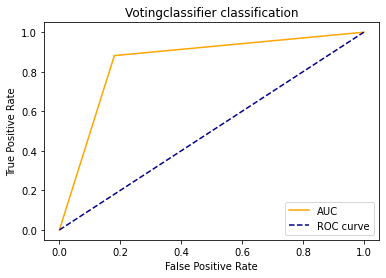

In [84]:
fpr, tpr, threshold = roc_curve(y_test,predictions)
print('AUC roc score: ',roc_auc_score(y_test,predictions)*100)
plt.plot(fpr, tpr, color ='orange', label ='AUC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Votingclassifier classification')
plt.legend()
plt.show()

In [86]:
# saving model on best accuracy ,f1 cv, and roc score
import joblib
joblib.dump(VotingClassifier(estimators=[('gd', clf1), ('rf', clf2), ('xg2', clf3)]),'customerchurn.obj')
customerchurn=joblib.load('customerchurn.obj')
pd.DataFrame({'Actual':y_test,'Prediction':predictions})

,Actual,Prediction
3920,0,0
757,0,0
348,0,1
4015,0,1
6971,1,1
...,...,...
1187,0,1
6678,1,1
2021,0,0
95,0,1
